In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
tips=sns.load_dataset('tips')
titanic=sns.load_dataset('titanic')
flights=sns.load_dataset('flights')
iris=sns.load_dataset('iris')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.shape

(244, 7)

In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [8]:
# tips.isnull().sum()

In [10]:
# tips.duplicated().sum

In [11]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

### 1 scatter plot (numerical vs numerical)

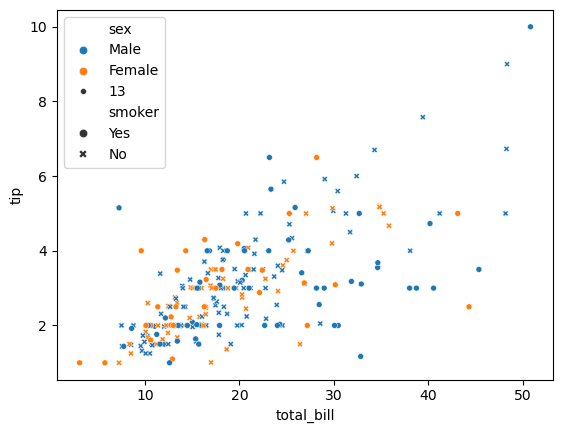

In [19]:
sns.scatterplot(data=tips,
                x='total_bill',
                y='tip',
                hue='sex',
                style='smoker',
                size=13
)
plt.show()

### 2. bar blot(numerical vs categorical)

In [21]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


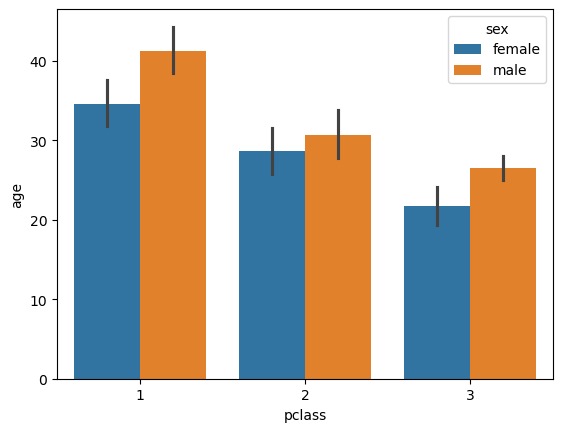

In [25]:
sns.barplot(data=titanic,
           x='pclass',
           y='age',
           hue='sex',
           
           )
plt.show()

### box plot(numerical - categorical)

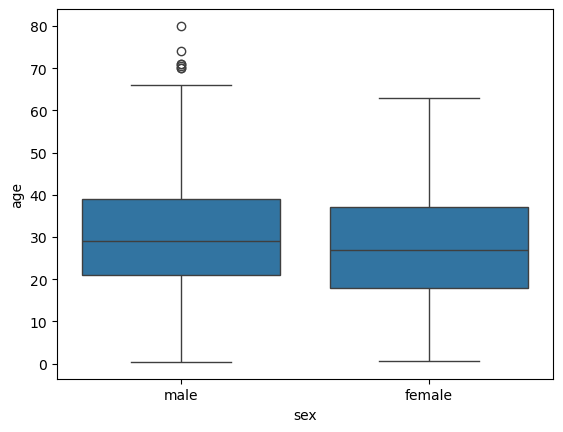

In [6]:
sns.boxplot(data=titanic,
           x='sex',
           y='age'
           )
plt.show()

C:\Users\IT SOLUTION\AppData\Local\Temp\ipykernel_320\695674964.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic['survived'] == 0]['age'], label='Not Survived')
C:\Users\IT SOLUTION\AppData\Local\Temp\ipykernel_320\695674964.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(

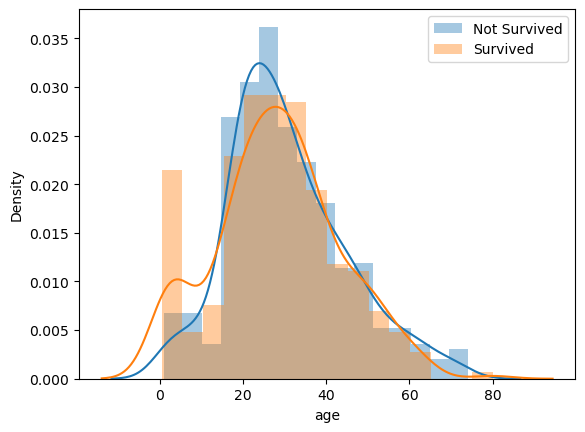

In [15]:
## dist plot
sns.distplot(titanic[titanic['survived'] == 0]['age'], label='Not Survived')
sns.distplot(titanic[titanic['survived'] == 1]['age'], label='Survived')
plt.legend()
plt.show()

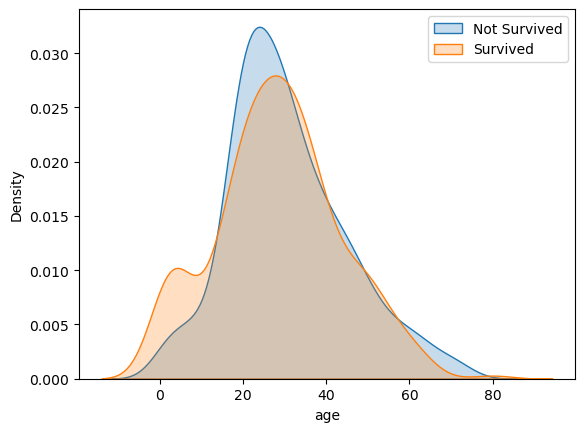

In [16]:
#  kde plot smoot distrubution

sns.kdeplot(
    data=titanic[titanic['survived'] == 0],
    x='age',
    label='Not Survived',
    fill=True
)

sns.kdeplot(
    data=titanic[titanic['survived'] == 1],
    x='age',
    label='Survived',
    fill=True
)

plt.legend()
plt.show()


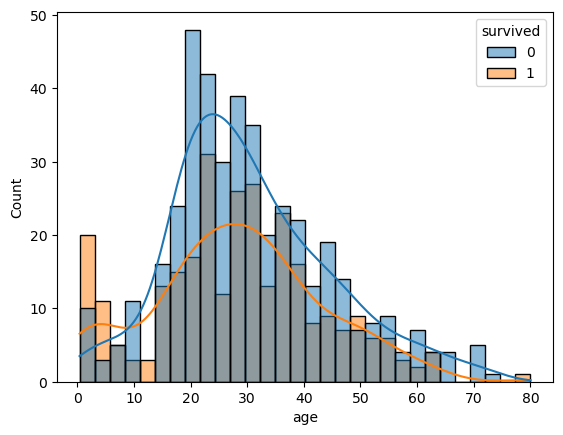

In [21]:
# histogram
sns.histplot(
    data=titanic,
    x='age',
    hue='survived',
    kde=True,
    bins=30
)

plt.show()


### heat map (categorical vs categorical)

In [27]:
 # pd.crosstab(titanic['pclass'],titanic['survived'])

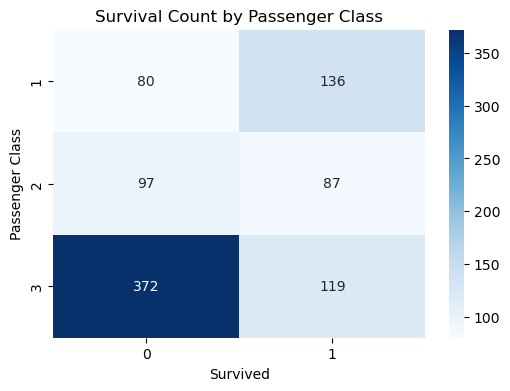

In [28]:
# Create crosstab
ct = pd.crosstab(titanic['pclass'], titanic['survived'])

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(
    ct,
    annot=True,
    fmt='d',
    cmap='Blues'
)

plt.title('Survival Count by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Passenger Class')
plt.show()

### pair plot 

In [29]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<function matplotlib.pyplot.show(close=None, block=None)>

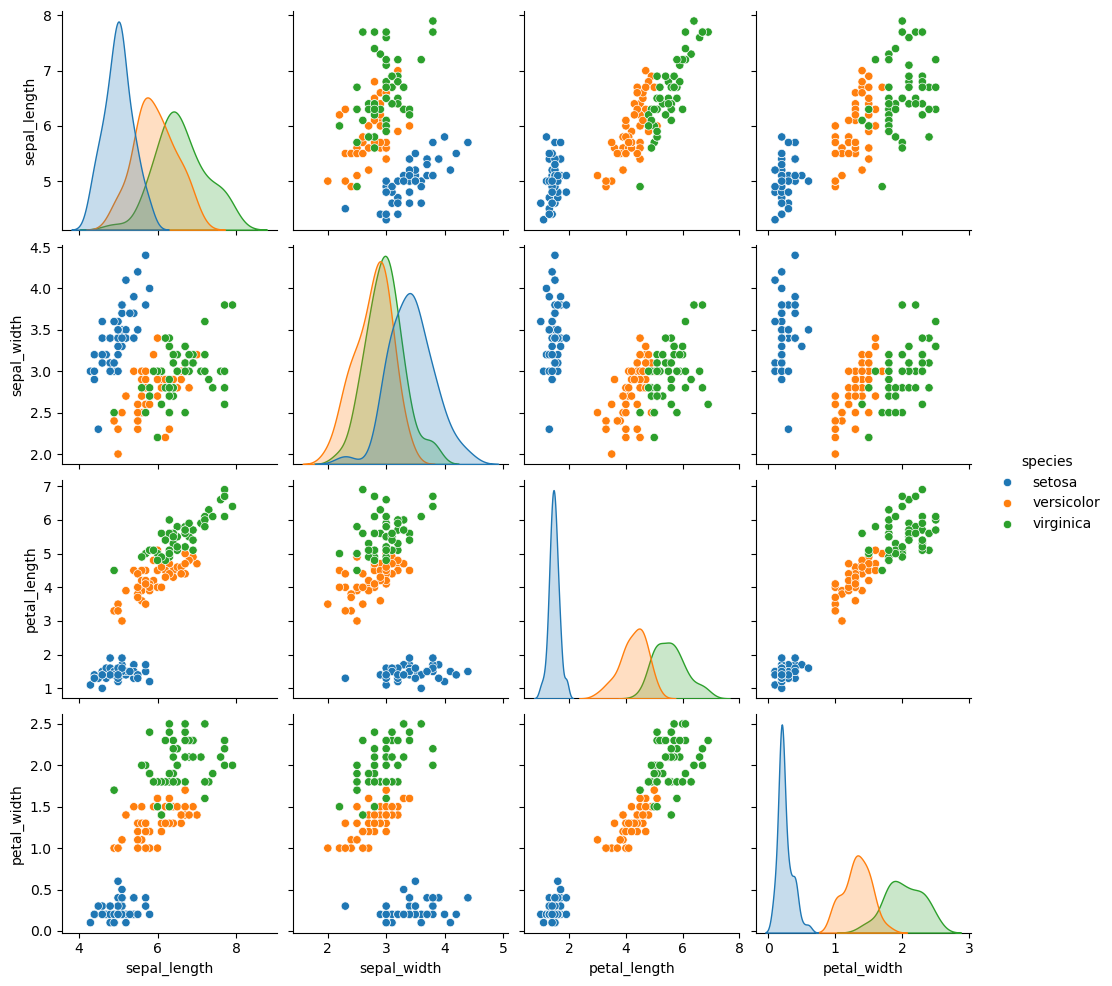

In [35]:
sns.pairplot(iris, hue='species') #diag_kind='kde'
plt.show

#### line plot

In [36]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [40]:
flights['year'].dtype

dtype('int64')

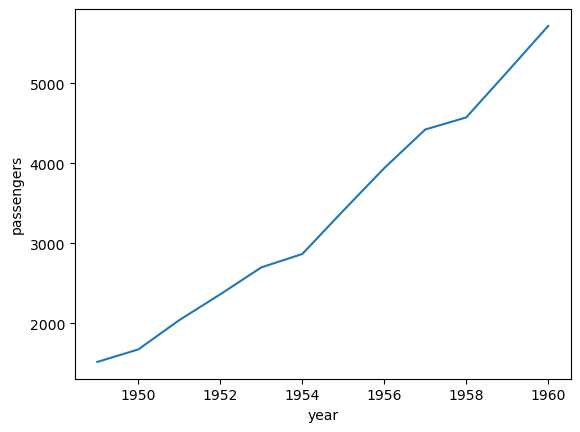

In [44]:
new = flights.groupby('year',as_index=False)['passengers'].sum()

sns.lineplot(
    data=new,
    x='year',
    y='passengers'
)

plt.show()

In [46]:
pivot = flights.pivot_table(
    values='passengers',
    index='month',
    columns='year'
)

pivot


C:\Users\IT SOLUTION\AppData\Local\Temp\ipykernel_320\5992087.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = flights.pivot_table(


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


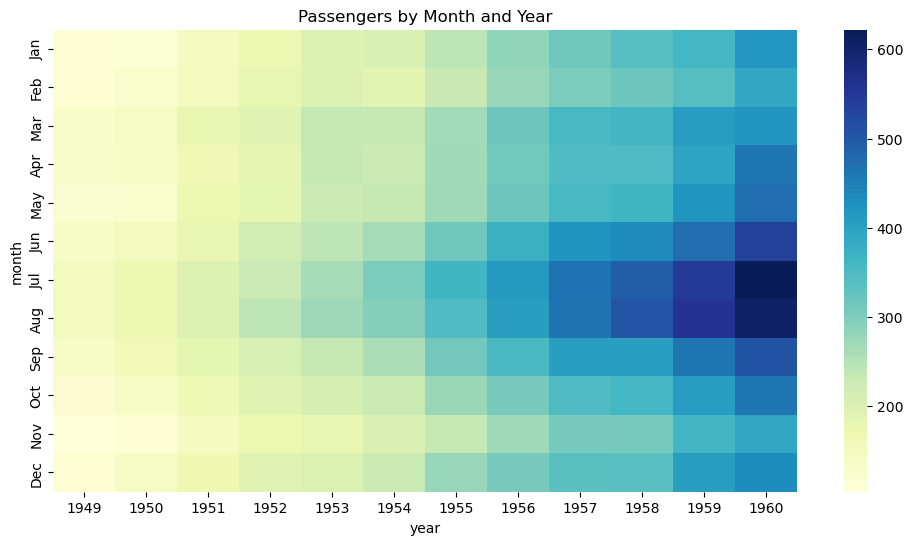

In [47]:
## heat map
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='YlGnBu')
plt.title('Passengers by Month and Year')
plt.show()